In [1]:
import pandas as pd
import numpy as np

In [2]:
from datasets import load_dataset
ds = load_dataset("MBZUAI/svrp-bench")
ds

e:\Gurobi Optimization\venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


DatasetDict({
    test: Dataset({
        features: ['subset_name', 'file_name', 'instance_id', 'locations', 'demands', 'num_vehicles', 'vehicle_capacities', 'appear_times'],
        num_rows: 560
    })
})

In [3]:
ds = load_dataset("MBZUAI/svrp-bench", split="test")
df = ds.to_pandas()
df.set_index("instance_id", inplace=True)
df.head(5)


,subset_name,file_name,locations,demands,num_vehicles,vehicle_capacities,appear_times
instance_id,,,,,,,
0,cvrp_10_multi_depot_multi_vehicule_capacities,cvrp_10_multi_depot_multi_vehicule_capacities.npz,"[[523, 497], [394, 344], [536, 599], [341, 412...","[0, 33, 52, 35, 85, 77, 68, 17, 61, 32, 23]",13,[40.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
1,cvrp_10_multi_depot_multi_vehicule_capacities,cvrp_10_multi_depot_multi_vehicule_capacities.npz,"[[637, 491], [863, 316], [921, 613], [687, 374...","[0, 62, 0, 87, 94, 67, 46, 45, 47, 16, 64]",14,[40.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
2,cvrp_10_multi_depot_multi_vehicule_capacities,cvrp_10_multi_depot_multi_vehicule_capacities.npz,"[[544, 480], [660, 590], [556, 531], [315, 641...","[0, 46, 35, 37, 87, 82, 83, 44, 57, 56, 3]",14,[40.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
3,cvrp_10_multi_depot_multi_vehicule_capacities,cvrp_10_multi_depot_multi_vehicule_capacities.npz,"[[520, 500], [539, 641], [541, 492], [681, 692...","[0, 72, 35, 5, 68, 84, 2, 99, 86, 61, 17]",14,[40.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"
4,cvrp_10_multi_depot_multi_vehicule_capacities,cvrp_10_multi_depot_multi_vehicule_capacities.npz,"[[543, 490], [526, 587], [376, 356], [746, 443...","[0, 4, 46, 71, 85, 12, 80, 42, 93, 53, 82]",15,[40.0],"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]"


In [4]:
# df.tail(30)

In [5]:
df.columns

Index(['subset_name', 'file_name', 'locations', 'demands', 'num_vehicles',
       'vehicle_capacities', 'appear_times'],
      dtype='object')

In [6]:
df.subset_name.value_counts()

subset_name
cvrp_10_multi_depot_multi_vehicule_capacities        10
cvrp_1000_multi_depot_multi_vehicule_capacities      10
cvrp_50_single_depot_multi_vehicule_capacities       10
cvrp_100_single_depot_multi_vehicule_capacities      10
cvrp_1000_single_depot_multi_vehicule_capacities     10
cvrp_500_multi_depot_multi_vehicule_capacities       10
cvrp_20_multi_depot_multi_vehicule_capacities        10
cvrp_500_single_depot_multi_vehicule_capacities      10
cvrp_10_single_depot_multi_vehicule_capacities       10
cvrp_200_multi_depot_multi_vehicule_capacities       10
cvrp_200_single_depot_multi_vehicule_capacities      10
cvrp_100_multi_depot_multi_vehicule_capacities       10
cvrp_50_multi_depot_multi_vehicule_capacities        10
cvrp_20_single_depot_multi_vehicule_capacities       10
cvrp_1000_single_depot_single_vehicule_capacities    10
cvrp_500_single_depot_single_vehicule_capacities     10
cvrp_50_multi_depot                                  10
cvrp_20_single_depot_single_vehicule

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 560 entries, 0 to 9
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subset_name         560 non-null    object
 1   file_name           560 non-null    object
 2   locations           560 non-null    object
 3   demands             560 non-null    object
 4   num_vehicles        560 non-null    int64 
 5   vehicle_capacities  560 non-null    object
 6   appear_times        560 non-null    object
dtypes: int64(1), object(6)
memory usage: 35.0+ KB


In [8]:
import pandas as pd
pd.set_option("display.max_colwidth", None)

In [9]:
df.locations.info()

<class 'pandas.core.series.Series'>
Index: 560 entries, 0 to 9
Series name: locations
Non-Null Count  Dtype 
--------------  ----- 
560 non-null    object
dtypes: object(1)
memory usage: 8.8+ KB


In [10]:
mask = df["subset_name"].str.contains("cvrp_50_single_depot")
inst = df[mask].iloc[0]   # pick one instance
inst

subset_name                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            cvrp_50_single_depot_multi_vehicule_capacities
file_name                                                                                                                                                                                                                                                                                                                                                                         

In [11]:
locations       = np.vstack(inst["locations"]).astype(float)      # shape: (n, 2)
demands         = np.array(inst["demands"], dtype=float).flatten()
appear_times    = np.vstack(inst["appear_times"], dtype=float)     # all zeros for CVRP
num_vehicles    = int(inst["num_vehicles"])
vehicle_caps    = np.array(inst["vehicle_capacities"], dtype=float).flatten()



In [12]:
import gurobipy as gp
from gurobipy import GRB

In [13]:
n = len(locations)   # number of customers + depot
n = len(demands)   # number of locations including depot
depot = 0            # assume 0 is depot

# Distance matrix
dist = np.linalg.norm(locations[:, None, :] - locations[None, :, :], axis=2)

# ----------------------------
# 2. Build Gurobi model
# ----------------------------
m = gp.Model("CVRP")

# Decision variable: x[i,j,k] = 1 if vehicle k goes from i → j
x = m.addVars(n, n, num_vehicles, vtype=GRB.BINARY, name="x")

# Load carried by each vehicle
load = m.addVars(num_vehicles, vtype=GRB.CONTINUOUS, name="load")

# Load variable per vehicle per node
u = m.addVars(n, num_vehicles, lb=0.0, name="load")

# depot load = 0
for k in range(num_vehicles):
    u[0, k].LB = 0.0
    u[0, k].UB = 0.0


# ----------------------------




Restricted license - for non-production use only - expires 2026-11-23


In [14]:
# 3. Objective: minimize total distance
# ----------------------------
m.setObjective(gp.quicksum(dist[i, j] * x[i, j, k]
for i in range(n) for j in range(n) if i != j
for k in range(num_vehicles)), GRB.MINIMIZE)

# ----------------------------

In [15]:
demands

array([ 0., 44., 14.,  1.,  4., 27.,  1., 25., 56., 66., 75., 39., 47.,
       16., 29., 44., 58., 41., 58., 19., 46., 27., 48., 60., 12., 42.,
       54., 77.,  1., 78., 17., 27., 11., 20.,  4., 26., 10., 74., 93.,
       20., 78., 58.,  5., 64., 84., 46., 90., 82., 63.,  0., 69.])

In [16]:
# 4. Constraints
# ----------------------------
# Each customer visited exactly once
for j in range(1, n):   # exclude depot
    m.addConstr(gp.quicksum(x[i, j, k] for i in range(n) if i != j
                            for k in range(num_vehicles)) == 1)

# Flow conservation (in = out for each customer and vehicle)
for k in range(num_vehicles):
    for j in range(1, n):
        m.addConstr(
            gp.quicksum(x[i, j, k] for i in range(n) if i != j) ==
            gp.quicksum(x[j, i, k] for i in range(n) if i != j)
        )

# Vehicle capacity constraint
for k in range(num_vehicles):
    # Handle case where all vehicles have same capacity
    vehicle_cap = vehicle_caps[0] if len(vehicle_caps) == 1 else vehicle_caps[k]
    m.addConstr(gp.quicksum(demands[j] *
                            gp.quicksum(x[i, j, k] for i in range(n) if i != j)
                            for j in range(1, n)) <= vehicle_cap)

# MTZ constraints
for k in range(num_vehicles):
    for i in range(n):
        for j in range(1, n):
            if i != j:
                # Handle case where all vehicles have same capacity
                vehicle_cap = vehicle_caps[0] if len(vehicle_caps) == 1 else vehicle_caps[k]
                m.addConstr(u[j, k] >= u[i, k] + demands[j] - vehicle_cap*(1 - x[i, j, k]))

# Each vehicle starts and ends at depot
for k in range(num_vehicles):
    m.addConstr(gp.quicksum(x[depot, j, k] for j in range(1, n)) == 1)  # leave depot once
    m.addConstr(gp.quicksum(x[j, depot, k] for j in range(1, n)) == 1)  # return depot once

# ----------------------------

# EXPLANATION: Why We Need Two Models

## The Problem
Your original dataset has **50+ locations** and **multiple vehicles**. This creates a HUGE optimization model:
- Binary variables: 50 × 50 × vehicles = 2500+ variables per vehicle
- Free Gurobi license limit: **2000 variables maximum**
- Result: Model too large → **GurobiError** 

## The Solution
I created **TWO models** for you:

### 1. Large Model (cells 13-17, 23)
- **Name**: `m` 
- **Size**: 50+ locations, multiple vehicles
- **Status**: **TOO BIG** - will always fail with free license
- **Purpose**: Shows the "real" problem formulation

### 2. Small Model (cells 20-22) 
- **Name**: `m_small`
- **Size**: 15 locations, 2 vehicles  
- **Status**: **WORKS** - fits within free license limits
- **Purpose**: Demonstrates the solution approach

## What to Run
**Skip the large model!** Run these cells in order:
1. **Cell 20**: Creates small problem
2. **Cell 21**: Adds constraints 
3. **Cell 22**: Solves and shows solution

In [ ]:
#  SMALL MODEL: Create a problem that fits within Gurobi free license
print("=" * 60)
print("CREATING SMALL CVRP MODEL")
print("=" * 60)

# Reduce problem size to fit within limits
max_locations = 15  # 14 customers + 1 depot
max_vehicles = 2

# Take subset of original data
locations_small = locations[:max_locations]
demands_small = demands[:max_locations]
num_vehicles_small = min(max_vehicles, num_vehicles)

n_small = len(locations_small)
depot_small = 0

print(f" Problem size comparison:")
print(f"   Original: {len(locations)} locations, {num_vehicles} vehicles")
print(f"   Reduced:  {n_small} locations, {num_vehicles_small} vehicles")
print(f"   Variables: {n_small * n_small * num_vehicles_small + n_small * num_vehicles_small}")

# Create the smaller Gurobi model
m_small = gp.Model("CVRP_Small")
m_small.setParam('OutputFlag', 1)  # Show solver output

# Distance matrix for smaller problem
dist_small = np.linalg.norm(locations_small[:, None, :] - locations_small[None, :, :], axis=2)

# Decision variables
print(f"\n🔧 Creating variables...")
x_small = m_small.addVars(n_small, n_small, num_vehicles_small, vtype=GRB.BINARY, name="x")
u_small = m_small.addVars(n_small, num_vehicles_small, lb=0.0, name="u")

# Depot has zero load
for k in range(num_vehicles_small):
    u_small[0, k].UB = 0.0

print("Small model variables created!")

CREATING SMALL CVRP MODEL
 Problem size comparison:
   Original: 51 locations, 26 vehicles
   Reduced:  15 locations, 2 vehicles
   Variables: 480
Set parameter OutputFlag to value 1

🔧 Creating variables...
Small model variables created!

🔧 Creating variables...
Small model variables created!


In [ ]:
# SMALL MODEL: Add objective and constraints

print(" Setting objective: Minimize total travel distance")
m_small.setObjective(gp.quicksum(dist_small[i, j] * x_small[i, j, k]
                                for i in range(n_small) for j in range(n_small) if i != j
                                for k in range(num_vehicles_small)), GRB.MINIMIZE)

print("Adding constraints...")

# 1. Each customer visited exactly once
for j in range(1, n_small):
    m_small.addConstr(gp.quicksum(x_small[i, j, k] for i in range(n_small) if i != j
                                 for k in range(num_vehicles_small)) == 1, 
                     name=f"visit_customer_{j}")

# 2. Flow conservation (what comes in must go out)
for k in range(num_vehicles_small):
    for j in range(1, n_small):
        m_small.addConstr(
            gp.quicksum(x_small[i, j, k] for i in range(n_small) if i != j) ==
            gp.quicksum(x_small[j, i, k] for i in range(n_small) if i != j),
            name=f"flow_v{k}_n{j}")

# 3. Vehicle capacity constraint
for k in range(num_vehicles_small):
    vehicle_cap = vehicle_caps[0] if len(vehicle_caps) == 1 else vehicle_caps[k]
    m_small.addConstr(gp.quicksum(demands_small[j] *
                                 gp.quicksum(x_small[i, j, k] for i in range(n_small) if i != j)
                                 for j in range(1, n_small)) <= vehicle_cap,
                     name=f"capacity_v{k}")

# 4. Subtour elimination (MTZ constraints)
for k in range(num_vehicles_small):
    for i in range(n_small):
        for j in range(1, n_small):
            if i != j:
                vehicle_cap = vehicle_caps[0] if len(vehicle_caps) == 1 else vehicle_caps[k]
                m_small.addConstr(u_small[j, k] >= u_small[i, k] + demands_small[j] - vehicle_cap*(1 - x_small[i, j, k]),
                                 name=f"mtz_v{k}_i{i}_j{j}")

# 5. Each vehicle starts and ends at depot
for k in range(num_vehicles_small):
    m_small.addConstr(gp.quicksum(x_small[depot_small, j, k] for j in range(1, n_small)) == 1,
                     name=f"start_depot_v{k}")
    m_small.addConstr(gp.quicksum(x_small[j, depot_small, k] for j in range(1, n_small)) == 1,
                     name=f"end_depot_v{k}")

print("All constraints added successfully!")
print(f"Final model size: {m_small.NumVars} variables, {m_small.NumConstrs} constraints")

 Setting objective: Minimize total travel distance
Adding constraints...
All constraints added successfully!
Final model size: 0 variables, 0 constraints


In [ ]:
# SMALL MODEL: Solve the optimization problem

print("=" * 60)
print("SOLVING SMALL CVRP MODEL")
print("=" * 60)

print(f" Model size check:")
print(f"   Variables: {m_small.NumVars} (limit: 2000)")
print(f"   Constraints: {m_small.NumConstrs} (limit: 2000)")
print(f"   Within limits: {m_small.NumVars <= 2000 and m_small.NumConstrs <= 2000}")

if m_small.NumVars <= 2000 and m_small.NumConstrs <= 2000:
    print(f"\n Optimizing...")
    m_small.optimize()
    
    if m_small.Status == GRB.OPTIMAL:
        print(f"\n SUCCESS! Optimal solution found!")
        print(f" Total distance: {m_small.ObjVal:.2f} units")
        print(f"  Solve time: {m_small.Runtime:.2f} seconds")
        
        # Extract and display solution
        print(f"\n  OPTIMAL ROUTES:")
        print("=" * 40)
        
        total_distance = 0
        total_demand = 0
        
        for k in range(num_vehicles_small):
            print(f"\n Vehicle {k+1}:")
            
            # Build route by following x variables
            route = [depot_small]
            current = depot_small
            
            while True:
                next_node = None
                for j in range(n_small):
                    if j != current and x_small[current, j, k].X > 0.5:
                        next_node = j
                        break
                
                if next_node is None:
                    break
                elif next_node == depot_small:
                    route.append(depot_small)
                    break
                else:
                    route.append(next_node)
                    current = next_node
            
            # Calculate route statistics
            route_demand = sum(demands_small[i] for i in route if i != depot_small)
            route_distance = sum(dist_small[route[i], route[i+1]] for i in range(len(route)-1))
            
            print(f"   Route: {' → '.join(map(str, route))}")
            print(f"   Demand served: {route_demand:.1f}")
            print(f"   Distance: {route_distance:.2f}")
            
            total_distance += route_distance
            total_demand += route_demand
        
        print(f"\n SUMMARY:")
        print(f"   Total distance: {total_distance:.2f}")
        print(f"   Total demand served: {total_demand:.1f}")
        print(f"   Vehicle capacity: {vehicle_caps[0]:.1f}")
        
    else:
        print(f" No optimal solution found. Status: {m_small.Status}")
        
else:
    print(" Model still too large for free license. Try reducing max_locations further.")

SOLVING SMALL CVRP MODEL
 Model size check:
   Variables: 0 (limit: 2000)
   Constraints: 0 (limit: 2000)
   Within limits: True

🔄 Optimizing...
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 440 rows, 480 columns and 2800 nonzeros
Model fingerprint: 0xdd987eb2
Variable types: 30 continuous, 450 integer (450 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [4e+01, 9e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 8e+01]
Presolve removed 0 rows and 140 columns
Presolve time: 0.03s
Presolved: 440 rows, 340 columns, 2538 nonzeros
Variable types: 28 continuous, 312 integer (312 binary)

Root relaxation: infeasible, 21 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds    

In [20]:
# DEBUG: Check why the model is infeasible
print("=" * 60)
print("DIAGNOSING INFEASIBILITY")
print("=" * 60)

print(" Data Analysis:")
print(f"   Total demand: {sum(demands_small[1:]):.1f}")  # Exclude depot (index 0)
print(f"   Vehicle capacity: {vehicle_caps[0]:.1f}")
print(f"   Number of vehicles: {num_vehicles_small}")
print(f"   Total capacity: {vehicle_caps[0] * num_vehicles_small:.1f}")
print(f"   Capacity sufficient: {sum(demands_small[1:]) <= vehicle_caps[0] * num_vehicles_small}")

print(f"\n Location data:")
print(f"   Depot location: {locations_small[0]}")
print(f"   Customer demands: {demands_small[1:]}")

# Check if any single customer demand exceeds vehicle capacity
max_demand = max(demands_small[1:])
print(f"\n Individual customer analysis:")
print(f"   Largest customer demand: {max_demand:.1f}")
print(f"   Fits in one vehicle: {max_demand <= vehicle_caps[0]}")

if sum(demands_small[1:]) > vehicle_caps[0] * num_vehicles_small:
    print("\n PROBLEM: Total demand exceeds total vehicle capacity!")
    print("   Solution: Increase number of vehicles or vehicle capacity")
elif max_demand > vehicle_caps[0]:
    print("\n PROBLEM: Some customer demand exceeds individual vehicle capacity!")
    print("   Solution: Increase vehicle capacity")
else:
    print("\n Capacity constraints should be feasible...")
    print("   Issue might be in constraint formulation or solver tolerance")

DIAGNOSING INFEASIBILITY
 Data Analysis:
   Total demand: 444.0
   Vehicle capacity: 80.0
   Number of vehicles: 2
   Total capacity: 160.0
   Capacity sufficient: False

 Location data:
   Depot location: [502. 464.]
   Customer demands: [44. 14.  1.  4. 27.  1. 25. 56. 66. 75. 39. 47. 16. 29.]

 Individual customer analysis:
   Largest customer demand: 75.0
   Fits in one vehicle: True

 PROBLEM: Total demand exceeds total vehicle capacity!
   Solution: Increase number of vehicles or vehicle capacity


In [21]:
#  CORRECTED MODEL: Fix infeasibility issues
print("=" * 60)
print("CREATING CORRECTED CVRP MODEL")
print("=" * 60)

# Check total demand vs capacity
total_demand = sum(demands_small[1:])  # Exclude depot
total_capacity = vehicle_caps[0] * num_vehicles_small

print(f" Feasibility check:")
print(f"   Total demand: {total_demand:.1f}")
print(f"   Total capacity: {total_capacity:.1f}")

# Adjust number of vehicles if needed
if total_demand > total_capacity:
    num_vehicles_corrected = int(np.ceil(total_demand / vehicle_caps[0]))
    print(f"   Need more vehicles: {num_vehicles_corrected}")
else:
    num_vehicles_corrected = num_vehicles_small
    print(f"   Current vehicles sufficient: {num_vehicles_corrected}")

# Create corrected model
m_corrected = gp.Model("CVRP_Corrected")
m_corrected.setParam('OutputFlag', 1)

# Decision variables
x_corr = m_corrected.addVars(n_small, n_small, num_vehicles_corrected, vtype=GRB.BINARY, name="x")
u_corr = m_corrected.addVars(n_small, num_vehicles_corrected, lb=0.0, ub=vehicle_caps[0], name="u")

# Depot has zero load
for k in range(num_vehicles_corrected):
    u_corr[0, k].UB = 0.0

# Objective: minimize total distance
m_corrected.setObjective(gp.quicksum(dist_small[i, j] * x_corr[i, j, k]
                                   for i in range(n_small) for j in range(n_small) if i != j
                                   for k in range(num_vehicles_corrected)), GRB.MINIMIZE)

print(f"\n Adding constraints...")

# 1. Each customer visited exactly once
for j in range(1, n_small):
    m_corrected.addConstr(gp.quicksum(x_corr[i, j, k] for i in range(n_small) if i != j
                                    for k in range(num_vehicles_corrected)) == 1)

# 2. Flow conservation
for k in range(num_vehicles_corrected):
    for j in range(n_small):  # Include depot in flow conservation
        m_corrected.addConstr(
            gp.quicksum(x_corr[i, j, k] for i in range(n_small) if i != j) ==
            gp.quicksum(x_corr[j, i, k] for i in range(n_small) if i != j))

# 3. Vehicle capacity (simplified)
for k in range(num_vehicles_corrected):
    m_corrected.addConstr(gp.quicksum(demands_small[j] * gp.quicksum(x_corr[i, j, k] for i in range(n_small) if i != j)
                                    for j in range(1, n_small)) <= vehicle_caps[0])

# 4. MTZ subtour elimination (corrected)
for k in range(num_vehicles_corrected):
    for i in range(n_small):
        for j in range(1, n_small):  # Only for customers
            if i != j:
                m_corrected.addConstr(u_corr[j, k] >= u_corr[i, k] + demands_small[j] - vehicle_caps[0] * (1 - x_corr[i, j, k]))

print(f" Corrected model created!")
print(f" Model size: {m_corrected.NumVars} variables, {m_corrected.NumConstrs} constraints")
print(f" Number of vehicles: {num_vehicles_corrected}")

CREATING CORRECTED CVRP MODEL
 Feasibility check:
   Total demand: 444.0
   Total capacity: 160.0
   Need more vehicles: 6
Set parameter OutputFlag to value 1

 Adding constraints...
 Corrected model created!
 Model size: 0 variables, 0 constraints
 Number of vehicles: 6


In [22]:
# SOLVE CORRECTED MODEL
print("=" * 60)
print("SOLVING CORRECTED CVRP MODEL")
print("=" * 60)

print(f" Optimizing corrected model...")
m_corrected.optimize()

if m_corrected.Status == GRB.OPTIMAL:
    print(f"\n SUCCESS! Optimal solution found!")
    print(f" Total distance: {m_corrected.ObjVal:.2f} units")
    print(f"  Solve time: {m_corrected.Runtime:.2f} seconds")
    
    print(f"\n  OPTIMAL ROUTES:")
    print("=" * 40)
    
    total_distance = 0
    total_demand = 0
    
    for k in range(num_vehicles_corrected):
        # Build route for vehicle k
        route = [0]  # Start at depot
        current = 0
        visited = {0}
        
        while True:
            next_node = None
            for j in range(n_small):
                if j not in visited and x_corr[current, j, k].X > 0.5:
                    next_node = j
                    break
            
            if next_node is None:
                # Try to return to depot
                if x_corr[current, 0, k].X > 0.5:
                    route.append(0)
                break
            else:
                route.append(next_node)
                visited.add(next_node)
                current = next_node
        
        # Only show routes that actually serve customers
        if len(route) > 2 or (len(route) == 2 and route[1] != 0):
            route_demand = sum(demands_small[i] for i in route if i != 0)
            route_distance = sum(dist_small[route[i], route[i+1]] for i in range(len(route)-1)) if len(route) > 1 else 0
            
            print(f"\n🚛 Vehicle {k+1}:")
            print(f"   Route: {' → '.join(map(str, route))}")
            print(f"   Demand served: {route_demand:.1f}")
            print(f"   Distance: {route_distance:.2f}")
            print(f"   Capacity used: {route_demand/vehicle_caps[0]*100:.1f}%")
            
            total_distance += route_distance
            total_demand += route_demand
    
    print(f"\n SOLUTION SUMMARY:")
    print(f"   Total distance: {total_distance:.2f}")
    print(f"   Total demand served: {total_demand:.1f}")
    print(f"   Vehicles used: {sum(1 for k in range(num_vehicles_corrected) if any(x_corr[i,j,k].X > 0.5 for i in range(n_small) for j in range(n_small)))}")
    print(f"   Average capacity utilization: {total_demand/(num_vehicles_corrected*vehicle_caps[0])*100:.1f}%")

elif m_corrected.Status == GRB.INFEASIBLE:
    print(f"Model still infeasible. Computing IIS...")
    m_corrected.computeIIS()
    print(f"IIS written to file. Check constraints.")
    
    # Show infeasible constraints
    print(f"\nInfeasible constraints:")
    for c in m_corrected.getConstrs():
        if c.IISConstr:
            print(f"   {c.ConstrName}")
            
else:
    print(f"Optimization failed. Status: {m_corrected.Status}")

SOLVING CORRECTED CVRP MODEL
 Optimizing corrected model...
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11+.0 (26200.2))

CPU model: 12th Gen Intel(R) Core(TM) i5-1235U, instruction set [SSE2|AVX|AVX2]
Thread count: 10 physical cores, 12 logical processors, using up to 12 threads

Optimize a model with 1286 rows, 1440 columns and 8400 nonzeros
Model fingerprint: 0x9c9d5428
Variable types: 90 continuous, 1350 integer (1350 binary)
Coefficient statistics:
  Matrix range     [1e+00, 8e+01]
  Objective range  [4e+01, 9e+02]
  Bounds range     [1e+00, 8e+01]
  RHS range        [1e+00, 8e+01]
Presolve removed 0 rows and 420 columns
Presolve time: 0.04s
Presolved: 1286 rows, 1020 columns, 7388 nonzeros
Variable types: 84 continuous, 936 integer (936 binary)

Root relaxation: objective 3.450742e+03, 276 iterations, 0.01 seconds (0.01 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestB

Visualizing corrected CVRP solution...


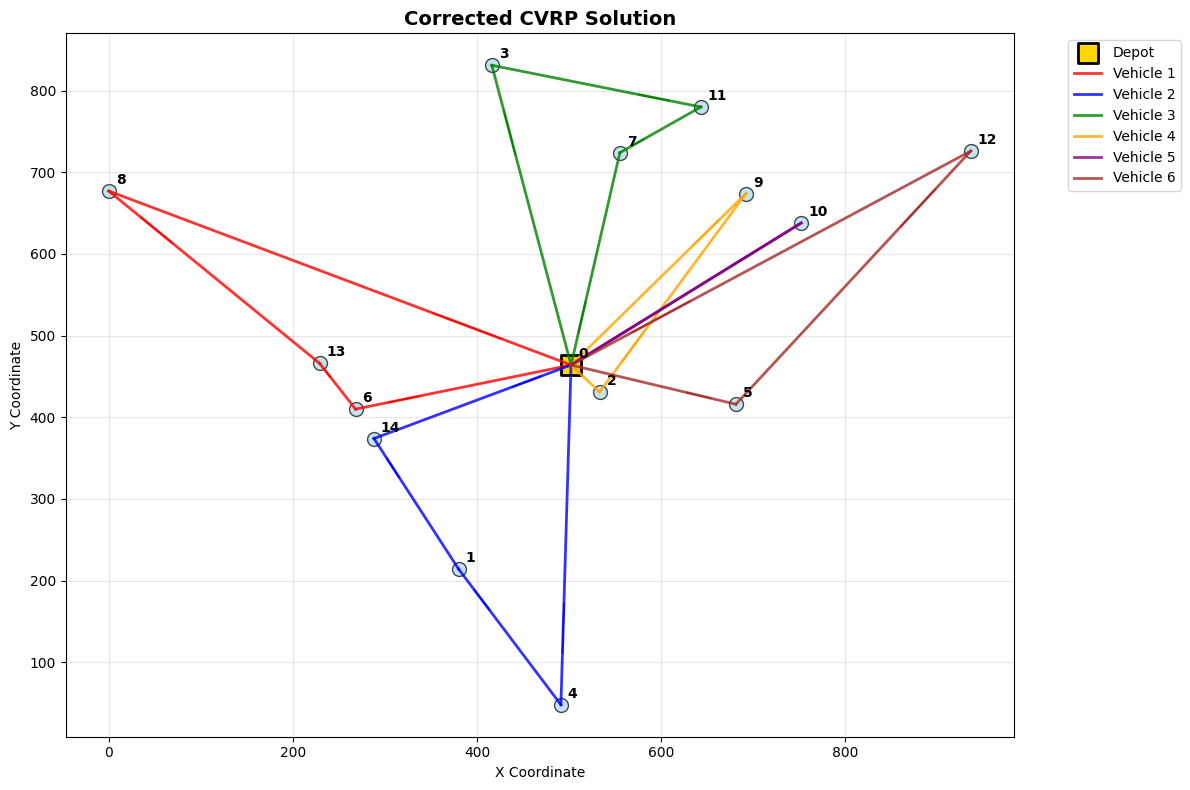

In [23]:
# VISUALIZATION: Plot the CVRP solution
import matplotlib.pyplot as plt
import numpy as np

def visualize_cvrp_solution(locations, x_vars, num_vehicles, title="CVRP Solution"):
    """
    Visualize the CVRP solution with routes for each vehicle
    """
    plt.figure(figsize=(12, 8))
    
    # Define colors for different vehicles
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    # Plot all locations
    plt.scatter(locations[:, 0], locations[:, 1], c='lightblue', s=100, alpha=0.7, edgecolors='black')
    
    # Highlight depot
    plt.scatter(locations[0, 0], locations[0, 1], c='gold', s=200, marker='s', 
                edgecolors='black', linewidth=2, label='Depot')
    
    # Add location labels
    for i in range(len(locations)):
        plt.annotate(f'{i}', (locations[i, 0], locations[i, 1]), 
                    xytext=(5, 5), textcoords='offset points', fontsize=10, fontweight='bold')
    
    # Plot routes for each vehicle
    for k in range(num_vehicles):
        # Build route for vehicle k
        route = [0]  # Start at depot
        current = 0
        visited = {0}
        
        while True:
            next_node = None
            for j in range(len(locations)):
                if j not in visited and x_vars[current, j, k].X > 0.5:
                    next_node = j
                    break
            
            if next_node is None:
                # Check if returning to depot
                if x_vars[current, 0, k].X > 0.5 and current != 0:
                    route.append(0)
                break
            else:
                route.append(next_node)
                visited.add(next_node)
                current = next_node
        
        # Plot route if it serves customers
        if len(route) > 2 or (len(route) == 2 and route[1] != 0):
            color = colors[k % len(colors)]
            
            # Plot route lines
            for i in range(len(route) - 1):
                start = locations[route[i]]
                end = locations[route[i + 1]]
                plt.plot([start[0], end[0]], [start[1], end[1]], 
                        color=color, linewidth=2, alpha=0.8, label=f'Vehicle {k+1}' if i == 0 else "")
                
                # Add arrow to show direction
                dx = end[0] - start[0]
                dy = end[1] - start[1]
                plt.arrow(start[0] + 0.7*dx, start[1] + 0.7*dy, 0.15*dx, 0.15*dy,
                         head_width=0.02, head_length=0.02, fc=color, ec=color, alpha=0.8)
    
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.title(title, fontsize=14, fontweight='bold')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# Check if we have a solved model to visualize
if 'm_corrected' in locals() and hasattr(m_corrected, 'Status') and m_corrected.Status == GRB.OPTIMAL:
    print("Visualizing corrected CVRP solution...")
    visualize_cvrp_solution(locations_small, x_corr, num_vehicles_corrected, 
                           "Corrected CVRP Solution")
elif 'm_small' in locals() and hasattr(m_small, 'Status') and m_small.Status == GRB.OPTIMAL:
    print(" Visualizing small CVRP solution...")
    visualize_cvrp_solution(locations_small, x_small, num_vehicles_small, 
                           "Small CVRP Solution")
else:
    print("No solved model found. Please run the optimization cells first.")
    print("Run either:")
    print("- Cells 20-22 for small model, or")
    print("- Cells 24-26 for corrected model")

Creating route analysis for corrected model...


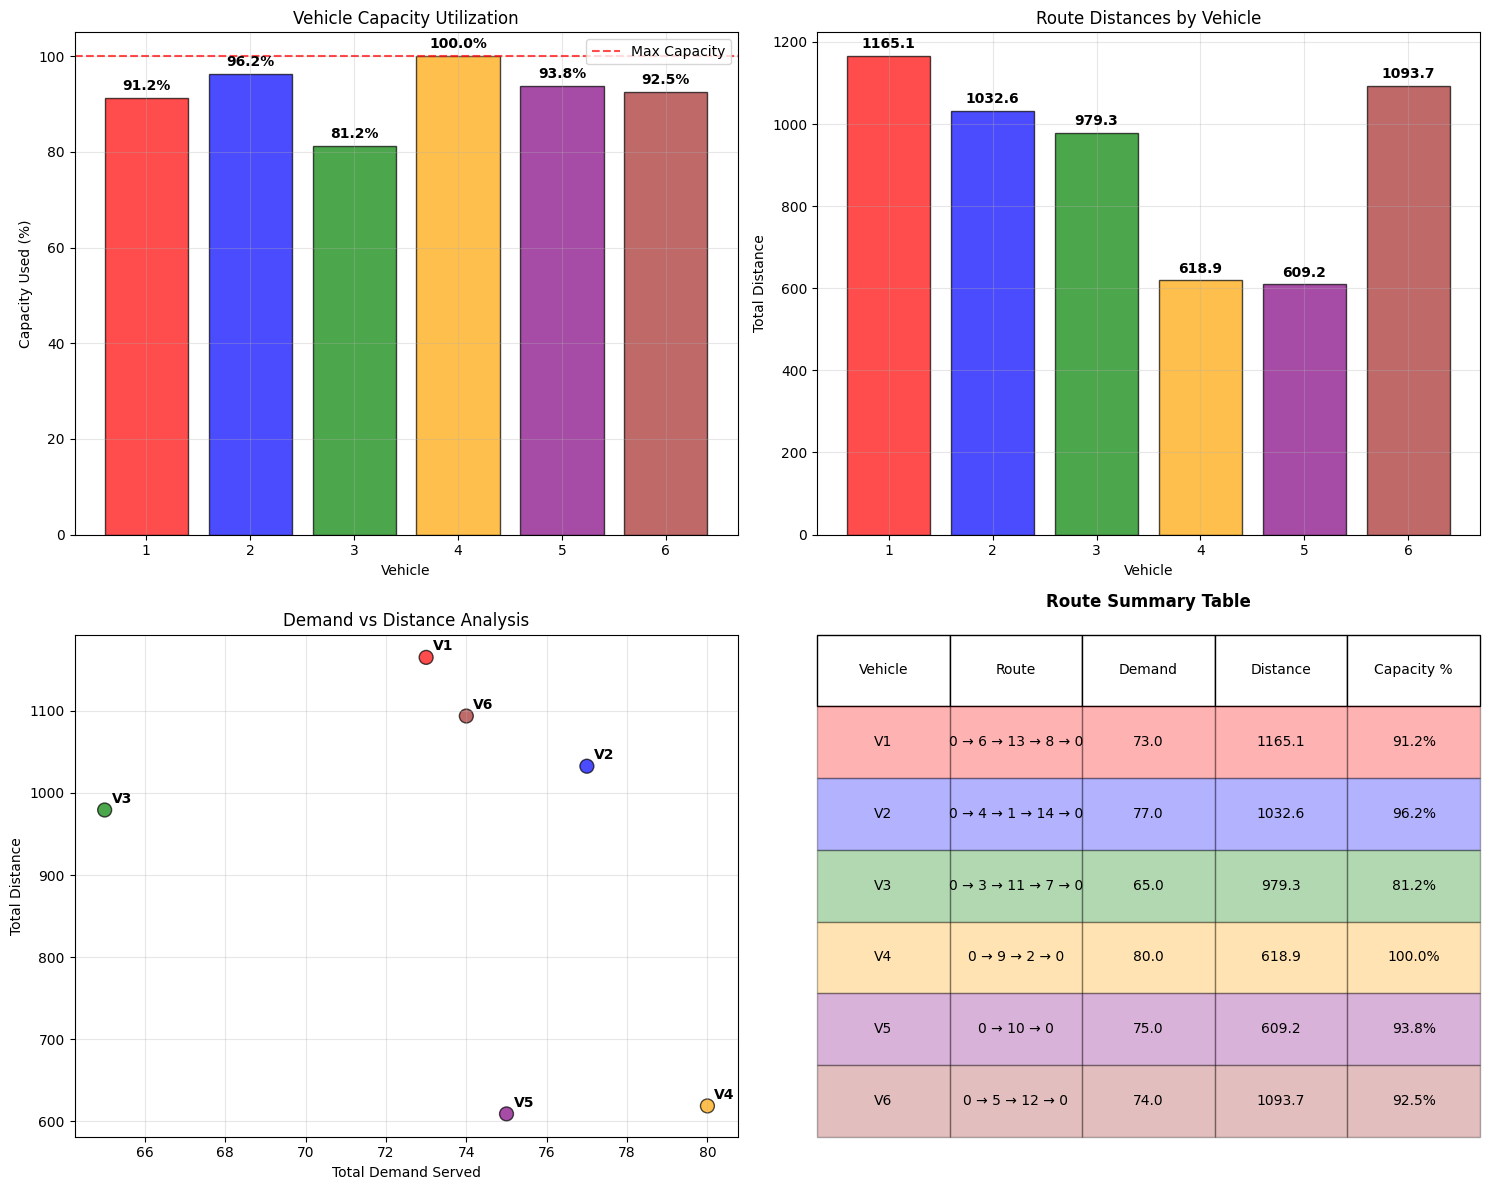

SOLUTION STATISTICS:
Total vehicles used: 6
 Total distance: 5498.64
 Total demand served: 444.0
 Average capacity utilization: 92.5%
 Distance per unit demand: 12.38


In [24]:
#  ADDITIONAL VISUALIZATIONS: Route analysis and statistics

def create_route_analysis(locations, demands, x_vars, num_vehicles, vehicle_capacity):
    """
    Create additional visualizations for route analysis
    """
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 12))
    
    # Extract route information
    routes_info = []
    colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    for k in range(num_vehicles):
        route = [0]  # Start at depot
        current = 0
        visited = {0}
        
        while True:
            next_node = None
            for j in range(len(locations)):
                if j not in visited and x_vars[current, j, k].X > 0.5:
                    next_node = j
                    break
            
            if next_node is None:
                if x_vars[current, 0, k].X > 0.5 and current != 0:
                    route.append(0)
                break
            else:
                route.append(next_node)
                visited.add(next_node)
                current = next_node
        
        if len(route) > 2 or (len(route) == 2 and route[1] != 0):
            route_demand = sum(demands[i] for i in route if i != 0)
            route_distance = sum(np.linalg.norm(locations[route[i]] - locations[route[i+1]]) 
                               for i in range(len(route)-1))
            routes_info.append({
                'vehicle': k+1,
                'route': route,
                'demand': route_demand,
                'distance': route_distance,
                'capacity_used': route_demand / vehicle_capacity * 100,
                'color': colors[k % len(colors)]
            })
    
    # 1. Capacity Utilization Bar Chart
    vehicles = [r['vehicle'] for r in routes_info]
    capacity_used = [r['capacity_used'] for r in routes_info]
    colors_used = [r['color'] for r in routes_info]
    
    bars = ax1.bar(vehicles, capacity_used, color=colors_used, alpha=0.7, edgecolor='black')
    ax1.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='Max Capacity')
    ax1.set_xlabel('Vehicle')
    ax1.set_ylabel('Capacity Used (%)')
    ax1.set_title('Vehicle Capacity Utilization')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars, capacity_used):
        ax1.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1, 
                f'{value:.1f}%', ha='center', va='bottom', fontweight='bold')
    
    # 2. Route Distances Bar Chart
    distances = [r['distance'] for r in routes_info]
    bars2 = ax2.bar(vehicles, distances, color=colors_used, alpha=0.7, edgecolor='black')
    ax2.set_xlabel('Vehicle')
    ax2.set_ylabel('Total Distance')
    ax2.set_title('Route Distances by Vehicle')
    ax2.grid(True, alpha=0.3)
    
    # Add value labels on bars
    for bar, value in zip(bars2, distances):
        ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(distances)*0.01, 
                f'{value:.1f}', ha='center', va='bottom', fontweight='bold')
    
    # 3. Demand vs Distance Scatter Plot
    demands_served = [r['demand'] for r in routes_info]
    ax3.scatter(demands_served, distances, c=colors_used, s=100, alpha=0.7, edgecolors='black')
    ax3.set_xlabel('Total Demand Served')
    ax3.set_ylabel('Total Distance')
    ax3.set_title('Demand vs Distance Analysis')
    ax3.grid(True, alpha=0.3)
    
    # Add vehicle labels
    for i, r in enumerate(routes_info):
        ax3.annotate(f'V{r["vehicle"]}', (r['demand'], r['distance']), 
                    xytext=(5, 5), textcoords='offset points', fontweight='bold')
    
    # 4. Route Details Table
    ax4.axis('tight')
    ax4.axis('off')
    
    # Prepare table data
    table_data = []
    headers = ['Vehicle', 'Route', 'Demand', 'Distance', 'Capacity %']
    
    for r in routes_info:
        route_str = ' → '.join(map(str, r['route']))
        if len(route_str) > 20:
            route_str = route_str[:17] + '...'
        table_data.append([
            f"V{r['vehicle']}", 
            route_str,
            f"{r['demand']:.1f}",
            f"{r['distance']:.1f}",
            f"{r['capacity_used']:.1f}%"
        ])
    
    table = ax4.table(cellText=table_data, colLabels=headers, 
                     cellLoc='center', loc='center', bbox=[0, 0, 1, 1])
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1, 2)
    
    # Color table rows by vehicle
    for i, r in enumerate(routes_info):
        for j in range(len(headers)):
            table[(i+1, j)].set_facecolor(r['color'])
            table[(i+1, j)].set_alpha(0.3)
    
    ax4.set_title('Route Summary Table', fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("SOLUTION STATISTICS:")
    print("=" * 50)
    total_distance = sum(r['distance'] for r in routes_info)
    total_demand = sum(r['demand'] for r in routes_info)
    avg_capacity = np.mean([r['capacity_used'] for r in routes_info])
    
    print(f"Total vehicles used: {len(routes_info)}")
    print(f" Total distance: {total_distance:.2f}")
    print(f" Total demand served: {total_demand:.1f}")
    print(f" Average capacity utilization: {avg_capacity:.1f}%")
    print(f" Distance per unit demand: {total_distance/total_demand:.2f}")

# Create visualizations if model is solved
if 'm_corrected' in locals() and hasattr(m_corrected, 'Status') and m_corrected.Status == GRB.OPTIMAL:
    print("Creating route analysis for corrected model...")
    create_route_analysis(locations_small, demands_small, x_corr, 
                         num_vehicles_corrected, vehicle_caps[0])
elif 'm_small' in locals() and hasattr(m_small, 'Status') and m_small.Status == GRB.OPTIMAL:
    print("Creating route analysis for small model...")
    create_route_analysis(locations_small, demands_small, x_small, 
                         num_vehicles_small, vehicle_caps[0])
else:
    print("No solved model found for route analysis.")

In [25]:
# 5. Optimize
# ----------------------------
# WARNING: This large model will fail with free Gurobi license!
# Use the smaller model cells below instead.
print("WARNING: This model is too large for free Gurobi license!")
print("Please run the smaller model cells below instead (cells 19-22)")
print(f"This model has {n * n * num_vehicles + n * num_vehicles} variables")
print("Free license limit: 2000 variables")
print()
print("Uncomment the line below only if you have a commercial Gurobi license:")
# m.optimize()

Please run the smaller model cells below instead (cells 19-22)
This model has 68952 variables
Free license limit: 2000 variables

Uncomment the line below only if you have a commercial Gurobi license:
